#### Insights

1) I have 717 Total Connections <br>

2) The date with the highest connection is '2021-02 (Feb)-28' with 24 connections <br>

3) The Month with the highest connection is '8(Aug)	2021' with 74 connections <br>

4) The year with the highest connection is 2021 with 279 connections  <br>

5) My first linkedin connection (Nitin) was made on '2019-07 (Sept)-17' (I also conncted with Pascal (2nd linkedin connection same day)<br>

6) I have more connections(9) working at Ennovate Lab   <br>

7) I have more connections (27) with the job title Software Engineer    <br>
.  <br>
.  <br>
.  <br>


In [1]:
import pandas as pd
import seaborn as sns
import calendar
import plotly.express as px
import warnings 
warnings.filterwarnings("ignore") 

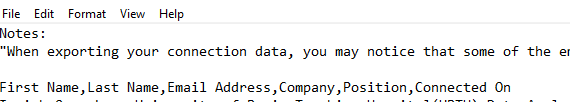

In [2]:
#the csv file has a note at the top of the file, the data starts from line 2
df = pd.read_csv('Connections.csv',header=2)

In [3]:
#remove email address , the names were not removed at this point intentionally
df = df.drop(['Email Address'],axis=1)

In [4]:
#convert connected on column to datetime
df['Connected On'] = pd.to_datetime(df['Connected On'])

df.head()

,First Name,Last Name,Company,Position,Connected On
0,Isaiah,Omenokpe,University of Benin Teaching Hospital(UBTH),Data Analyst,2022-04-11
1,Steve,Ajudua,African Alliance Insurance,"GM/Lead, Business Development",2022-04-11
2,Temitope,"Ogunbolu, MBA PMP",Chevron,Lead Data Engineer,2022-04-08
3,Nicolas,Braga,Dadosfera (anteriormente DataSprints),Data Engineer,2022-04-06
4,Toyin,Olape,Wragby Business Solutions & Technologies Limited,Data Science Lead,2022-04-06


In [5]:
#first connection date and details
df[df['Connected On'] ==df['Connected On'].min()]

,First Name,Last Name,Company,Position,Connected On
715,Paschal Chukwuemeka,Amah,Kobo360,Head of Data + Insights,2019-07-17
716,Nitin,M,Xilytica,Data Science & Machine Learning Trainer,2019-07-17


In [6]:
#last connection date and details

df[df['Connected On'] ==df['Connected On'].max()]

,First Name,Last Name,Company,Position,Connected On
0,Isaiah,Omenokpe,University of Benin Teaching Hospital(UBTH),Data Analyst,2022-04-11
1,Steve,Ajudua,African Alliance Insurance,"GM/Lead, Business Development",2022-04-11


In [7]:
#drop first name and last name
df = df.drop(['First Name','Last Name'],axis=1)

In [8]:
#split date into day, month,year

df['day'] = df['Connected On'].dt.day
df['month'] = df['Connected On'].dt.month
df['year'] = df['Connected On'].dt.year

In [9]:
#drop connected on column
df = df.drop('Connected On',axis=1)

In [10]:
#Days with the highest connection 

max_df = df.groupby(['day','month','year'])
max_df_count = max_df.size().reset_index(name='count')
max_df_count.sort_values(by='count',ascending=False).head()
#2nd,3rd,4th days with the highest connection happened in the same month and year

,day,month,year,count
277,28,2,2021,24
143,16,8,2021,12
236,24,8,2021,10
250,25,8,2021,10
298,29,9,2021,9


In [11]:
#companies i have more connections from
df['Company'].value_counts(dropna=True).head()

Ennovate Lab    9
Freelance       8
StudentBuild    7
Stanbic IBTC    4
Tek Experts     4
Name: Company, dtype: int64

In [12]:
#job title of connections
df['Position'].value_counts(dropna=True).head()


Software Engineer          24
Data Analyst               16
Data Scientist             16
Data Engineer              13
Chief Executive Officer     8
Name: Position, dtype: int64

In [13]:
#total connections
df.shape[0]

717

In [14]:
#connections per year
df['year'].value_counts()

2021    279
2020    243
2019    149
2022     46
Name: year, dtype: int64

<AxesSubplot:xlabel='year', ylabel='count'>

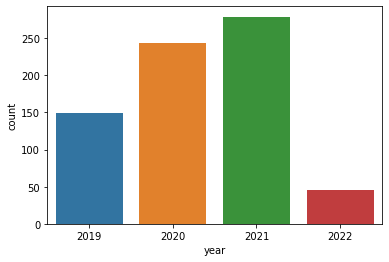

In [15]:
sns.countplot(x='year', data=df)

In [16]:
#connections over the year
grouped = df.groupby(['month','year']).size().reset_index(name='count')
grouped.sort_values(by='count',ascending=False).head()

,month,year,count
21,8,2021,74
12,5,2020,61
4,2,2021,59
16,7,2019,48
1,1,2021,36


### from the above table, it can be observed that
1) the month with the highest connection for 2021 is 8 (Aug) with 74 connections <br>
2) the month with the highest connection for 2020 is 5 (May) with 61 connections <br>
3) the month with the highest connection for 2019 is 7 (Jul) with 48 connections <br>


In [17]:
grouped['Month_date'] = grouped['month'].apply(lambda integer_month: calendar.month_abbr[integer_month]) +' ' +grouped['year'].astype(str)

In [18]:
sub_group = grouped[['Month_date','count']]

In [19]:

sub_group['Month_date'] = pd.to_datetime(sub_group['Month_date'])

In [20]:
fig = px.bar(sub_group,'Month_date','count',title="connections over the years")

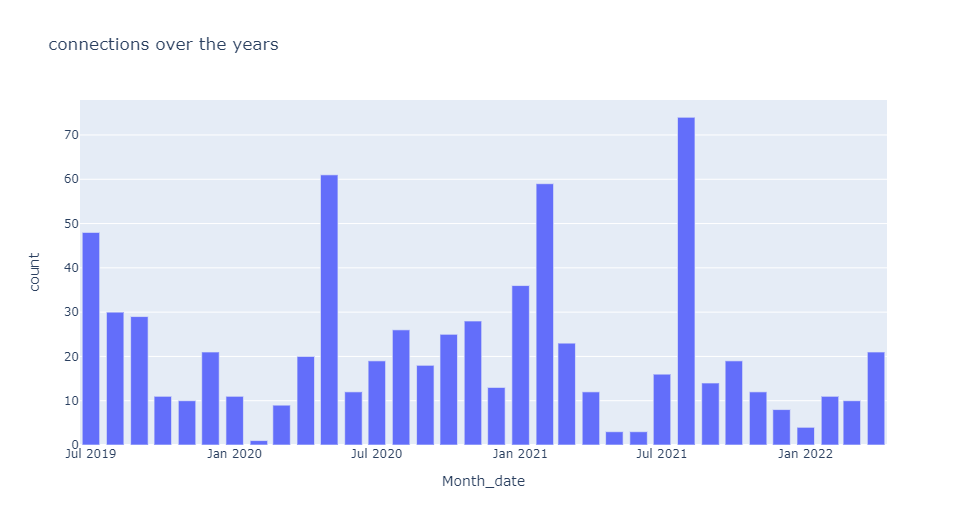

## Lead

In [21]:
#number of people with lead in their position/Job title

lead = df.loc[df['Position'].str.contains("Lead", case=False,na=False)]
lead.head()

,Company,Position,day,month,year
1,African Alliance Insurance,"GM/Lead, Business Development",11,4,2022
2,Chevron,Lead Data Engineer,8,4,2022
4,Wragby Business Solutions & Technologies Limited,Data Science Lead,6,4,2022
8,Bundle Africa,Lead Data Engineer & Analyst,4,4,2022
11,Accenture,Data Engineer Team Lead / Tech Lead,4,4,2022


In [22]:
#Number of connections with Lead in their Job Title/Position
lead.shape[0]

43

In [23]:
founder = df.loc[df['Position'].str.contains("Founder", case=False,na=False)]
founder.head()

,Company,Position,day,month,year
39,The Eternal View Hub,Co-Founder,21,2,2022
82,Crowdpoint,Cofounder & CEO,13,10,2021
88,Dynamixity,Co-Founder,29,9,2021
89,Jacob's Farm,CEO/FOUNDER,29,9,2021
103,JAIDSON TECH,Founder,27,8,2021


In [24]:
#Number of connections with founder or co founder in their Job Title/Position
founder.shape[0]

25